In [3]:
!pip install pandas-datareader

# Modelo de previsão de ações

In [4]:
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = (18,8)

In [65]:
data_inico = '2020-01-01'
data_fim = '2022-09-01'
df = data.DataReader('itsa4.sa', 'yahoo', data_inico, data_fim)

In [67]:
#criando novos campos de medias móveis
df['mm7'] = df['Adj Close'].rolling(9).mean()
df['mm21d'] = df['Adj Close'].rolling(21).mean()

In [68]:
# vou colar um dia pra frente  o df pq se naão eu vou ver o valor da previção já dado,
#ou seja vou rodar o modelo já sabendo o valor kkkk
df['Adj Close'] = df['Adj Close'].shift(-1)
df.head()

,High,Low,Open,Close,Volume,Adj Close,mm7,mm21d
Date,,,,,,,,
2020-01-02,13.695238,13.400000,13.466666,13.666666,19199040.0,11.933980,NaN,NaN
2020-01-03,13.676190,13.447619,13.523809,13.466666,22913100.0,11.908662,NaN,NaN
2020-01-06,13.533333,13.342857,13.447619,13.438095,21286440.0,11.748303,NaN,NaN
2020-01-07,13.466666,13.161904,13.447619,13.257142,21072555.0,11.571065,NaN,NaN
2020-01-08,13.380952,13.028571,13.285714,13.057142,20354565.0,11.343189,NaN,NaN


In [69]:
# vamos apagar os dados nulos pq o modelo não vai ler essas infos NaN
df.dropna(inplace=True)
df

,High,Low,Open,Close,Volume,Adj Close,mm7,mm21d
Date,,,,,,,,
2020-01-30,12.457142,12.171428,12.276190,12.457142,19917975.0,10.853677,11.151885,11.401866
2020-01-31,12.361904,12.114285,12.304761,12.247619,24818010.0,10.845240,11.100308,11.341983
2020-02-03,12.361904,12.200000,12.266666,12.238095,14611275.0,10.870558,11.076865,11.290139
2020-02-04,12.428571,12.247619,12.390476,12.266666,13722450.0,10.929633,11.038417,11.240705
2020-02-05,12.561904,12.304761,12.428571,12.333333,26663280.0,10.819915,10.982151,11.201721
...,...,...,...,...,...,...,...,...
2022-08-25,9.410000,9.290000,9.310000,9.380000,13062000.0,9.325956,9.354945,9.086363
2022-08-26,9.460000,9.300000,9.390000,9.350000,14256700.0,9.266110,9.350444,9.122193
2022-08-29,9.380000,9.260000,9.330000,9.290000,14116400.0,9.315982,9.334888,9.156116


In [70]:
qtd_linhas = len(df)

qtd_linhas_treino= round(.60 * qtd_linhas)
qtd_linhas_teste= 227 
qtd_linhas_validacao = qtd_linhas -1

info = (
    f"linhas treino= 0:{qtd_linhas_treino}"
    f" linhas teste= {qtd_linhas_treino}:{qtd_linhas_treino + qtd_linhas_teste -1}"
    f" linhas validação= {qtd_linhas_validacao}"
)

info

'linhas treino= 0:386 linhas teste= 386:612 linhas validação= 642'

In [71]:
df["data_pregao"] = df.index
df

,High,Low,Open,Close,Volume,Adj Close,mm7,mm21d,data_pregao
Date,,,,,,,,,
2020-01-30,12.457142,12.171428,12.276190,12.457142,19917975.0,10.853677,11.151885,11.401866,2020-01-30
2020-01-31,12.361904,12.114285,12.304761,12.247619,24818010.0,10.845240,11.100308,11.341983,2020-01-31
2020-02-03,12.361904,12.200000,12.266666,12.238095,14611275.0,10.870558,11.076865,11.290139,2020-02-03
2020-02-04,12.428571,12.247619,12.390476,12.266666,13722450.0,10.929633,11.038417,11.240705,2020-02-04
2020-02-05,12.561904,12.304761,12.428571,12.333333,26663280.0,10.819915,10.982151,11.201721,2020-02-05
...,...,...,...,...,...,...,...,...,...
2022-08-25,9.410000,9.290000,9.310000,9.380000,13062000.0,9.325956,9.354945,9.086363,2022-08-25
2022-08-26,9.460000,9.300000,9.390000,9.350000,14256700.0,9.266110,9.350444,9.122193,2022-08-26
2022-08-29,9.380000,9.260000,9.330000,9.290000,14116400.0,9.315982,9.334888,9.156116,2022-08-29


In [72]:
#reindexando o data frame
df = df.reset_index(drop=True)
df
df_completo = df

In [73]:
#separando as features e labels
features = df.drop(['Close', 'Adj Close', 'data_pregao'], 1)

labels = df['Adj Close']

C:\Users\gustavo.aguiar\AppData\Local\Temp\ipykernel_4316\3937649546.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  features = df.drop(['Close', 'Adj Close', 'data_pregao'], 1)


In [74]:
#Agora vamos escolher as melhores variaveis para da nossa base de dados com Kbest

from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [75]:

features_list = ('Open','High','Low','Volume','mm7','mm21d')

k_best_features = SelectKBest(k='all')
k_best_features.fit_transform(features, labels)
k_best_features_scores = k_best_features.scores_
raw_pairs = zip(features_list[1:], k_best_features_scores)
ordered_pairs = list(reversed(sorted(raw_pairs, key=lambda x: x[1])))

k_best_features_final = dict(ordered_pairs[:15])
best_features = k_best_features_final.keys()
print ('')
print ("Melhores features:")
print (k_best_features_final)


Melhores features:
{'Low': 40.12953848646654, 'High': 31.135306528388153, 'Volume': 23.540618875473555, 'mm21d': 20.556106409772777, 'mm7': 1.866076182944781}


In [76]:
#Separa os dados de treino teste e validação
X_train = features[:qtd_linhas_treino]
X_test = features[qtd_linhas_treino:qtd_linhas_treino + qtd_linhas_teste -1]

y_train = labels[:qtd_linhas_treino]
y_test = labels[qtd_linhas_treino:qtd_linhas_treino + qtd_linhas_teste -1]

print( len(X_train), len(y_train))

print( len(X_test), len(y_test))

386 386
226 226


In [77]:
# Normalizando os dados de entrada(features)

# Gerando o novo padrão
scaler = MinMaxScaler()
X_train_scale = scaler.fit_transform(X_train)  # Normalizando os dados de entrada(treinamento)
X_test_scale  = scaler.transform(X_test)       # Normalizando os dados de entrada(teste)

In [78]:
#treinamento usando regressão linear
lr = linear_model.LinearRegression()
lr.fit(X_train_scale, y_train)
pred= lr.predict(X_test_scale)
cd =r2_score(y_test, pred)

f'Coeficiente de determinação:{cd * 100:.2f}'

'Coeficiente de determinação:66.91'

In [79]:
valor_novo = features.tail(58)
valor_novo

,High,Low,Open,Volume,mm7,mm21d
585,9.05,8.85,9.01,22070500.0,9.239428,9.249452
586,8.85,8.69,8.83,21768600.0,9.149511,9.232103
587,8.84,8.65,8.77,14858000.0,9.064712,9.208630
588,8.88,8.74,8.80,28652100.0,8.983217,9.184694
589,8.88,8.57,8.71,35504100.0,8.899519,9.159799
590,9.01,8.63,8.66,20861300.0,8.841150,9.144350
591,9.00,8.76,8.97,17255500.0,8.784984,9.119477
592,8.89,8.74,8.79,20133300.0,8.747541,9.090841
593,8.89,8.67,8.86,17764500.0,8.703489,9.049000
594,8.77,8.63,8.72,11085400.0,8.674855,9.012804


In [80]:
#executando a previsão
previsao=scaler.transform(valor_novo)
pred=lr.predict(previsao)

pred

array([8.51933882, 8.38844974, 8.3259027 , 8.42819526, 8.27372973,
       8.34932748, 8.19119773, 8.30210983, 8.12416612, 8.14548712,
       8.22175592, 8.03514057, 8.05688529, 7.95344091, 7.91136403,
       7.81444954, 7.81630288, 7.79251989, 7.96328264, 7.88537618,
       7.69273024, 7.72181334, 7.74022835, 7.6432603 , 7.79169421,
       7.95487508, 7.98867082, 7.91242127, 7.94001081, 7.86636808,
       8.08183226, 8.02791206, 8.10310795, 8.16437705, 8.22368026,
       8.02372396, 8.18610875, 8.21739454, 8.39412125, 8.41042105,
       8.54390304, 8.6813136 , 8.82996582, 8.74206587, 8.90572448,
       8.88706218, 8.89275069, 9.03210214, 9.01486129, 8.92894663,
       8.9623169 , 8.9027783 , 8.94876695, 8.95718121, 8.9011586 ,
       8.87123382, 8.96451236, 8.71762318])

In [81]:
data_pregao_full=df_completo['data_pregao']
data_pregao=data_pregao_full.tail(58)

res_full=df_completo['Adj Close']
res=res_full.tail(58)

df=pd.DataFrame({'data_pregao':data_pregao, 'real':res, 'previsao':pred})


df.set_index('data_pregao', inplace=True)

df.head()

,real,previsao
data_pregao,,
2022-06-10,8.672653,8.519339
2022-06-13,8.642919,8.388450
2022-06-14,8.712299,8.325903
2022-06-15,8.553714,8.428195
2022-06-17,8.821326,8.273730


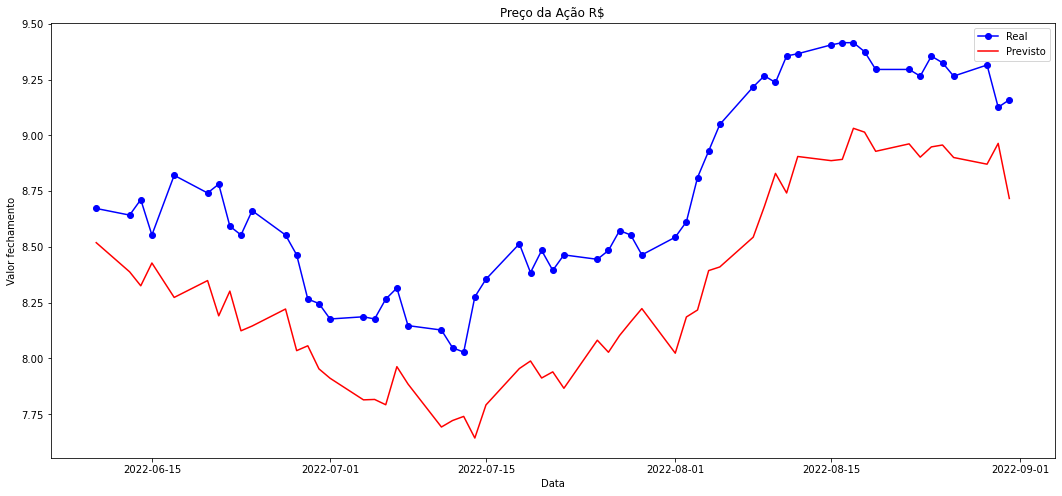

In [82]:
#plotagem
plt.title("Preço da Ação R$")
plt.plot(df["real"],label = "Real", color = "blue", marker = 'o')
plt.plot(df["previsao"],label = "Previsto", color = "red")
plt.xlabel("Data")
plt.ylabel("Valor fechamento")
plt.legend()

In [83]:
for index, row in df.iterrows():
    df.loc[index,'diferenca'] = (df.loc[index,'real'] - df.loc[index,'previsao']);

In [84]:
df.head()

,real,previsao,diferenca
data_pregao,,,
2022-06-10,8.672653,8.519339,0.153314
2022-06-13,8.642919,8.388450,0.254469
2022-06-14,8.712299,8.325903,0.386397
2022-06-15,8.553714,8.428195,0.125519
2022-06-17,8.821326,8.273730,0.547597
